# Processing Continuous Features

### Scaling
One of the biggest issues with continuous features is that they can fall in vastly different ranges. 
For example, weight can fall within 50 - 200, but then prices could fall within 10,000 - 100,000 and this large difference can negatively impact model performance. 
This way this is deal with is by scaling or normalizing the data to a similar range.

#### Min-Max Normalization - Scales all the data between [0, 1] as a default but you can pick any 2 numbers to scale between.

#### Standarization - Standard scaling subtracts the mean and divides by the standard deviation. This centers the feature on zero with unit variance.

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv' # use car datset 
df = pd.read_csv(url)

In [9]:
#_get_numeric_data() to extract numeric features.

s_scaler = StandardScaler()
s_scaler.fit_transform(df._get_numeric_data())[0:2] #see the first two rows of the data

array([[-0.48065337, -0.38430339, -0.25001763,  0.44694283,  0.36213685,
        -0.82516657, -0.07526789,  1.69937769,  1.10512038, -1.03805226,
        -0.073951  , -0.39873848, -0.2869241 , -0.38556457, -0.59493137,
        -0.45114161,         nan, -0.66974939],
       [ 1.37651281,  1.4769886 ,  1.62105445, -0.75857269, -0.76131043,
         0.5208798 ,  1.05375051,  0.37087396, -0.04131291,  0.39229331,
        -0.073951  ,  0.82497617,  1.61952715,  0.4131049 , -0.29054788,
         0.71508753,  0.32697514,  0.76329797]])

In [10]:
mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(df._get_numeric_data())[0:2]

array([[0.16020672, 0.1559633 , 0.15117892, 0.32258065, 0.36666667,
        0.17021277, 0.34693878, 0.92592593, 0.64476386, 0.2247191 ,
        0.5       , 0.46153846, 0.4137931 , 0.44444444, 0.38461538,
        0.44117647,        nan, 0.41908714],
       [0.58139535, 0.48623853, 0.42718447, 0.09677419, 0.16666667,
        0.46808511, 0.59183673, 0.62962963, 0.41683778, 0.49438202,
        0.5       , 0.69230769, 0.86206897, 0.61111111, 0.46153846,
        0.64705882, 0.5625    , 0.77385892]])

You can see in both cases that the data is now in a very close range and this will lead to much better ML predictions.

### Transformation
If we have skewed data, and we want the data to be in a more normal distribution (which can be useful for some models)
we can use data transformations. The most common one is log transformations.

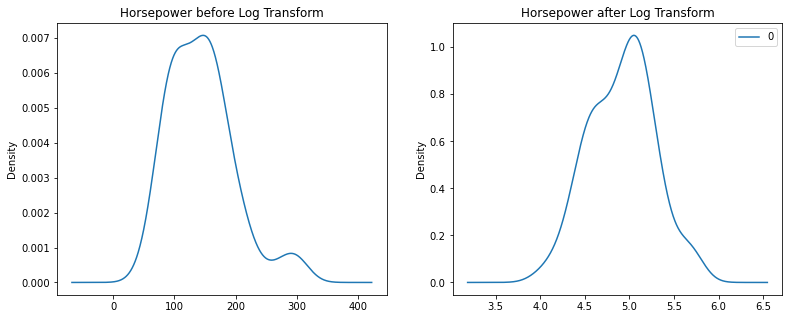

In [12]:
fig,ax=plt.subplots(1,2,figsize=(13, 5))
df['Horsepower'].plot(kind = 'kde', ax=ax[0]);
ax[0].set_title('Horsepower before Log Transform')
transformer = FunctionTransformer(np.log1p, validate=True) #np.log1p -  Calculates log(1 + x).
pd.DataFrame(transformer.transform(df[['Horsepower']].dropna())).plot(kind = 'kde', ax=ax[1]);
ax[1].set_title('Horsepower after Log Transform')
plt.show()

### Binning
For example, age might be a more useful feature when binned into ranges: such as 0-20, 20-30 and so on.
It then becomes a categorical feature.

In [13]:
data = pd.DataFrame({'age':[10,20,40,50,44,56,12,34,56, 75, 87, 22, 13, 34, 42, 43, 52]})
data['agebinned'] = pd.cut(data.age, bins=range(0, 101, 10), retbins=False,include_lowest=True)
data

,age,agebinned
0,10,"(-0.001, 10.0]"
1,20,"(10.0, 20.0]"
2,40,"(30.0, 40.0]"
3,50,"(40.0, 50.0]"
4,44,"(40.0, 50.0]"
5,56,"(50.0, 60.0]"
6,12,"(10.0, 20.0]"
7,34,"(30.0, 40.0]"
8,56,"(50.0, 60.0]"
9,75,"(70.0, 80.0]"


## Ex
Use binning to divide the Weight feature into 4 bins and then label encode the bins.
Add this new column to the DataFrame

In [17]:
w_min,w_max=df.Weight.min(),df.Weight.max()
df['Weightbinned'] = pd.cut(df.Weight, bins=range(int(w_min), int(w_max)+1, 4), retbins=False,include_lowest=True)
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Weightbinned
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra,"(2703.0, 2707.0]"
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend,"(3559.0, 3563.0]"
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90,"(3371.0, 3375.0]"
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100,"(3403.0, 3407.0]"
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i,"(3639.0, 3643.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan,"(3959.0, 3963.0]"
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat,"(2983.0, 2987.0]"
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado,"(2807.0, 2811.0]"
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,...,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240,"(2983.0, 2987.0]"
